In [1]:
# 만든 .py 파일

from IPython import display
import matplotlib.patches as patches
import pylab as pl
import time
import tensorflow.compat.v1 as tf
import os

tf.compat.v1.disable_eager_execution()

In [3]:
# 설정값을 정의한다.
gridSize = 10
maxGames = 100
# env = CatchEnvironment(gridSize)
winCount = 0
lossCount = 0
numberOfGames = 0

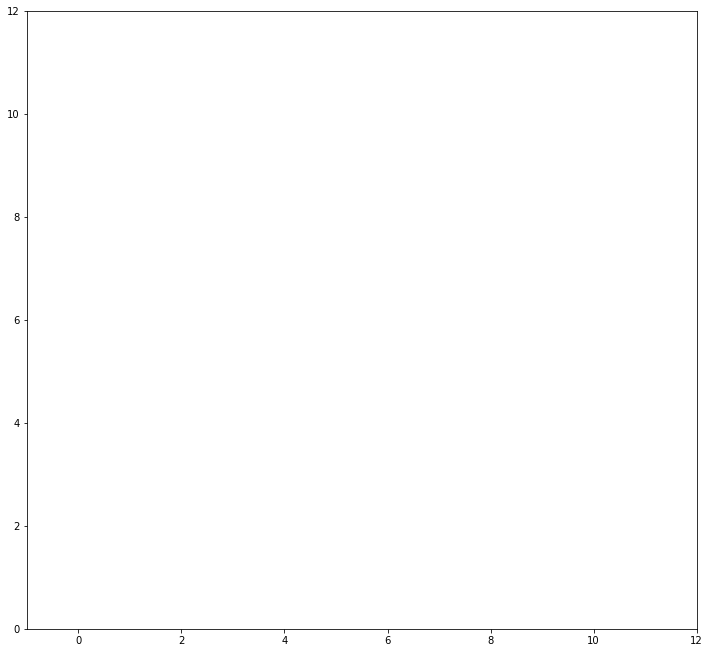

In [12]:
# 그래프 관련 설정
ground = 1
plot = pl.figure(figsize = (12,12))
axis = plot.add_subplot(111, aspect='equal')
axis.set_xlim([-1,12])
axis.set_ylim([0, 12])

# 파라미터를 불러오기 위한 Saver 선언
#saver = tf.train.Saver()

# 현재 상태를 그리기 위한 drawState 함수를 정의한다.
def drawState(fruitRow, fruitColumn, basket, gridSize):
    # 과일의 세로축을 담겠다.
    fruitX = fruitColumn
    # 과일의 가로축을 계산해서 담는다.
    fruitY = (gridSize - fruitRow + 1)
    # 승리 횟수, 패배 회수, 전체 게임 횟수를 화면 상단에 출력한다.
    statusTitle = f'Wins"{winCount}, Losses : {lossCount}, TotalGames:{numberOfGames}'
    axis.set_title(statusTitle)
    
    # 배경, 과일, 바구니를 그린다.
    for p in [
        # 배경설정
        patches.Rectangle(((ground - 1), (ground)), 11, 10, facecolor = '#000000'),
        # 바구니 설정
        patches.Rectangle((basket - 1, ground), 2, 0.5, facecolor = '#FF0000'),
        # 과일 설정
        patches.Rectangle((fruitX - 0.5, fruitY - 0.5), 1,1, facecolor = '#0000FF')
        
    ]: axis.add_patch(p)
        
    # 화면 청소
    display.clear_output(wait=True)
    
    # 새로 그리기
    display.display(pl.gcf())
    
    
# 행동을 예측하여 그림을 그린다.
with tf.Session() as sess:
    # 저장된 파라미터를 불러온다.
    saver.restore(sess, 'model.ckpt')
    print('저장된 파라미터를 불러왔습니다.')
    
    # 지정된 횟수만큼 게임을 반복한다.
    while numberOfGames < maxGames:
        # 진행 게임수를 증가한다.
        numberOfGames = numberOfGames + 1
        
        # 최초 게임 상태를 설정한다.
        isGameOver = False
        fruitRow, fruitColumn, basket = env.reset()
        currentState = env.observe()
        drawState(fruitRow, fruitColumn, basket, gridSize)
        
        # 한판이 종료될때까지 반복한다.
        while isGameOver != True:
            # 현재 상태에서 q값이 가장 큰 행위를 가져온다.
            q = sess.run(y_pred, feed_dict={x:currentState})
            action = q.argmax()
            
            # 행동을 수행하고 다음 상태로 넘어간다.
            nextState, reward, gameOver, stateinfo = env.act(action)
            fruitRow = stateInfo[0]
            fruitColumn = stateInfo[1]
            basket = stateInfo[2]
            
            # 과일을 받아내면 winCount를 1 증가한다.
            if reward == 1:
                winCount = winCount + 1
            
            # 과일을 받아내지 못했담녀 lossCount를 1 증가한다.
            elif reward == -1:
                lossCount = lossCount + 1
                
            # 다음 판으로 넘어가기 위한 셋팅
            currentState = nextState
            isGameOver = gameOver
            # 그린다.
            drawState(fruitRow, fruitColumn, basket, gridSize)
            # 딜레이를 준다.
            time.sleep(0.05)

            
            